# FLIPKART GRID 4.0

## Problem Statement 3: Extract Trends from social media data
As part of this challenge, teams are expected to identify trends from social media data; From all the products available on Flipkart identify trending products, utilize all signals available (ex. posts, sessions,check-ins, social graphs, media Content, etc.). 
Output should also have photos, videos, gifs which can be used on Flipkart app.Preferred tech: Open source 
- Bonus: Signal extraction from multiple social media channels (ex. FB, Instagram, Twitter, etc.)

### Importing Datasets

- These are the some required inbuilt datasets to do this analysis

In [74]:
from wordcloud import WordCloud, STOPWORDS
import warnings
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import datetime
import json
import wordcloud
from matplotlib import rcParams
import pandas as pd

In [75]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Reading CSV dataset using pandas

In [76]:
df = pd.read_csv("Flipkart_Dataset.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [77]:
#listing top 5 rows from the dataset and along their headings
df.head()

image_id  time_stamp  likes  no_of_comments  \
0   2001_1  09-05-2020  15773         3831.00   
1   2002_1  26-01-2021  76728          257.00   
2   2001_2  29-04-2022  55143          381.00   
3   2002_2  16-11-2020  89229          267.00   
4   2001_3  19-03-2022  97482          319.00   

                                       post_metadata  \
0  ntro shot:\nGold choker- @opalinajewellery\nKu...   
1  @Top in Off-White @Rodebjer Linn Silk  @SweetS...   
2  Look 1:\nT-shirt- @vis.a.via\nSkirt- Zara\nHee...   
3                               @Length SleevesScoop   
4    #Embroidered Lehangaand and blouse set #lehanga   

                                  post_link  
0  https://www.instagram.com/p/CgTev_mp_fD/  
1  https://www.instagram.com/p/CJvy5magLo//  
2  https://www.instagram.com/p/Cc74SOuJAkw/  
3  https://www.instagram.com/p/CHpk2PoAXOy/  
4  https://www.instagram.com/p/CbR8k0RpIN_/

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image_id        236 non-null    object 
 1   time_stamp      236 non-null    object 
 2   likes           236 non-null    int64  
 3   no_of_comments  234 non-null    float64
 4   post_metadata   236 non-null    object 
 5   post_link       234 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.2+ KB


In [86]:
df.drop(df[df['time_stamp']>'30-07-2022'].index,inplace=True)

- From the dataset we have a non-null attributes
- Through this there is some null values in 'no.of comments' and 'post link'
- By Data cleaning these null values are converted into non-null values


In [79]:
df[df["no_of_comments"].apply(lambda x: pd.isna(x))].head(3)

image_id  time_stamp  likes  no_of_comments  \
21   2005_03  18-06-2022   3673             NaN   
194   5285_6  12-07-2022   4571             NaN   

                                         post_metadata  \
21                             long puffy prom dresses   
194  #Sumangali #lengha #bridal , #suits #leng #bri...   

                                             post_link  
21   https://www.instagram.com/p/Ce8RuYiDHQT/?utm_s...  
194  https://www.instagram.com/p/Cf5s/2Nj5RS/?utm_s...

In [80]:
#df['time_stamp'] = df['time_stamp'].str.replace('/','-')
df["no_of_comments"]=df["no_of_comments"].fillna(value=1)
df['no_of_comments']=df['no_of_comments'].astype('int')
df["post_link"]=df["post_link"].fillna(value='NaN')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_id        236 non-null    object
 1   time_stamp      236 non-null    object
 2   likes           236 non-null    int64 
 3   no_of_comments  236 non-null    int32 
 4   post_metadata   236 non-null    object
 5   post_link       236 non-null    object
dtypes: int32(1), int64(1), object(4)
memory usage: 10.3+ KB


- Clearly every attribute and values are non-null in the dataset

### Year Wise Data Count

- Now analyse the data by year wise

In [81]:
df["time_stamp"]=pd.to_datetime(df["time_stamp"])
cdf=df.groupby(df['time_stamp'].dt.year)['image_id'].count().reset_index()
df['time_stamp'].dt.year

0      2020
1      2021
2      2022
3      2020
4      2022
       ... 
231    2022
232    2022
233    2022
234    2022
235    2022
Name: time_stamp, Length: 236, dtype: int64

In [66]:
#df.drop(df[df['time_stamp']>'30-07-2022'].index,inplace=True)

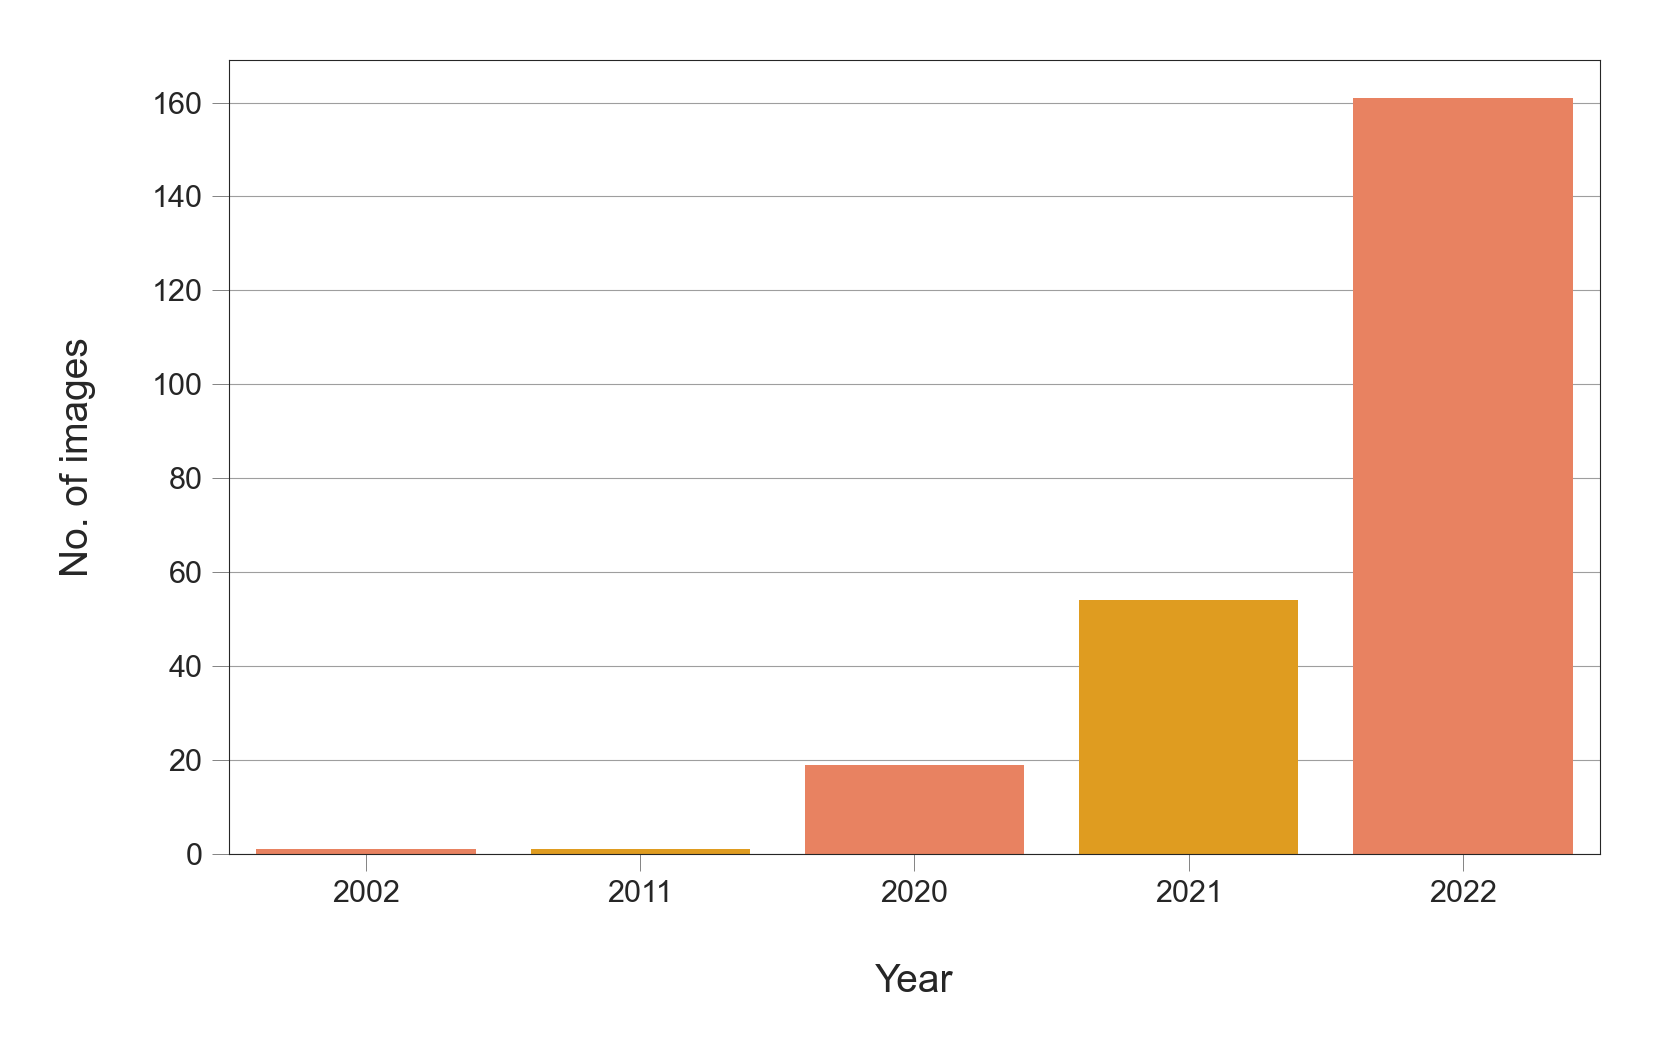

In [82]:
fig, ax = plt.subplots()
_ = sns.barplot(x="time_stamp", y="image_id", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of images")

In [87]:
df['month']=df['time_stamp'].dt.month

In [88]:
dff1=df[df['time_stamp'].dt.year==2022]

In [89]:
dff2=dff1.groupby('month')['image_id'].count().reset_index()
dff2

month  image_id
0      1         9
1      2         9
2      3        14
3      4        11
4      5        15
5      6        26
6      7        54

### Month wise data plot

In [71]:
months=dff2['month'].to_list()
count=dff2['image_id'].to_list()

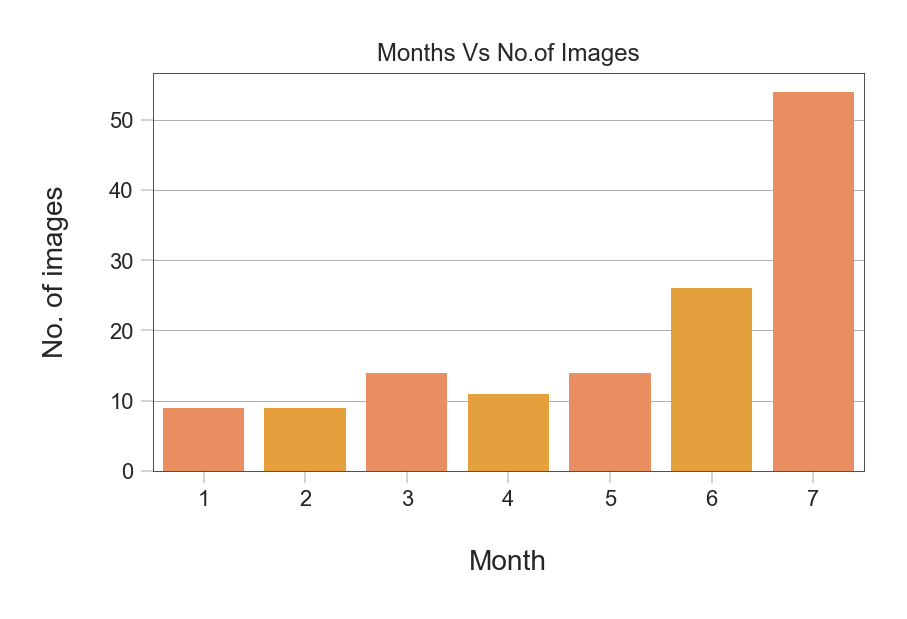

In [72]:
fig, ax = plt.subplots()
_ = sns.barplot(x="month", y="image_id", data=dff2, 
                palette=sns.color_palette(['#ff864a', '#ffa620'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Month", ylabel="No. of images", title="Months Vs No.of Images")

In [73]:
df.describe()

likes  no_of_comments  month
count     211.00          211.00 211.00
mean   232133.34         1415.82   5.90
std    455704.54         2191.84   2.81
min        87.00            0.00   1.00
25%      2427.50           39.50   4.00
50%     13604.00          196.00   6.00
75%    327639.50         2652.00   7.00
max   3696402.00        12856.00  12.00

### Getting Iterative Words from the post metadata
- Counter is the method used to find the frequency of the individual words in the post metadata

In [19]:
title_words = list(df["post_metadata"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
data=Counter(title_words).most_common(20)
data.sort()
data

[(',', 205),
 ('.', 65),
 ('Look', 19),
 ('The', 19),
 ('Zara', 19),
 ('a', 43),
 ('and', 85),
 ('at', 20),
 ('by', 20),
 ('for', 52),
 ('in', 52),
 ('is', 28),
 ('of', 33),
 ('or', 20),
 ('our', 29),
 ('the', 68),
 ('this', 21),
 ('to', 33),
 ('with', 64),
 ('you', 20)]

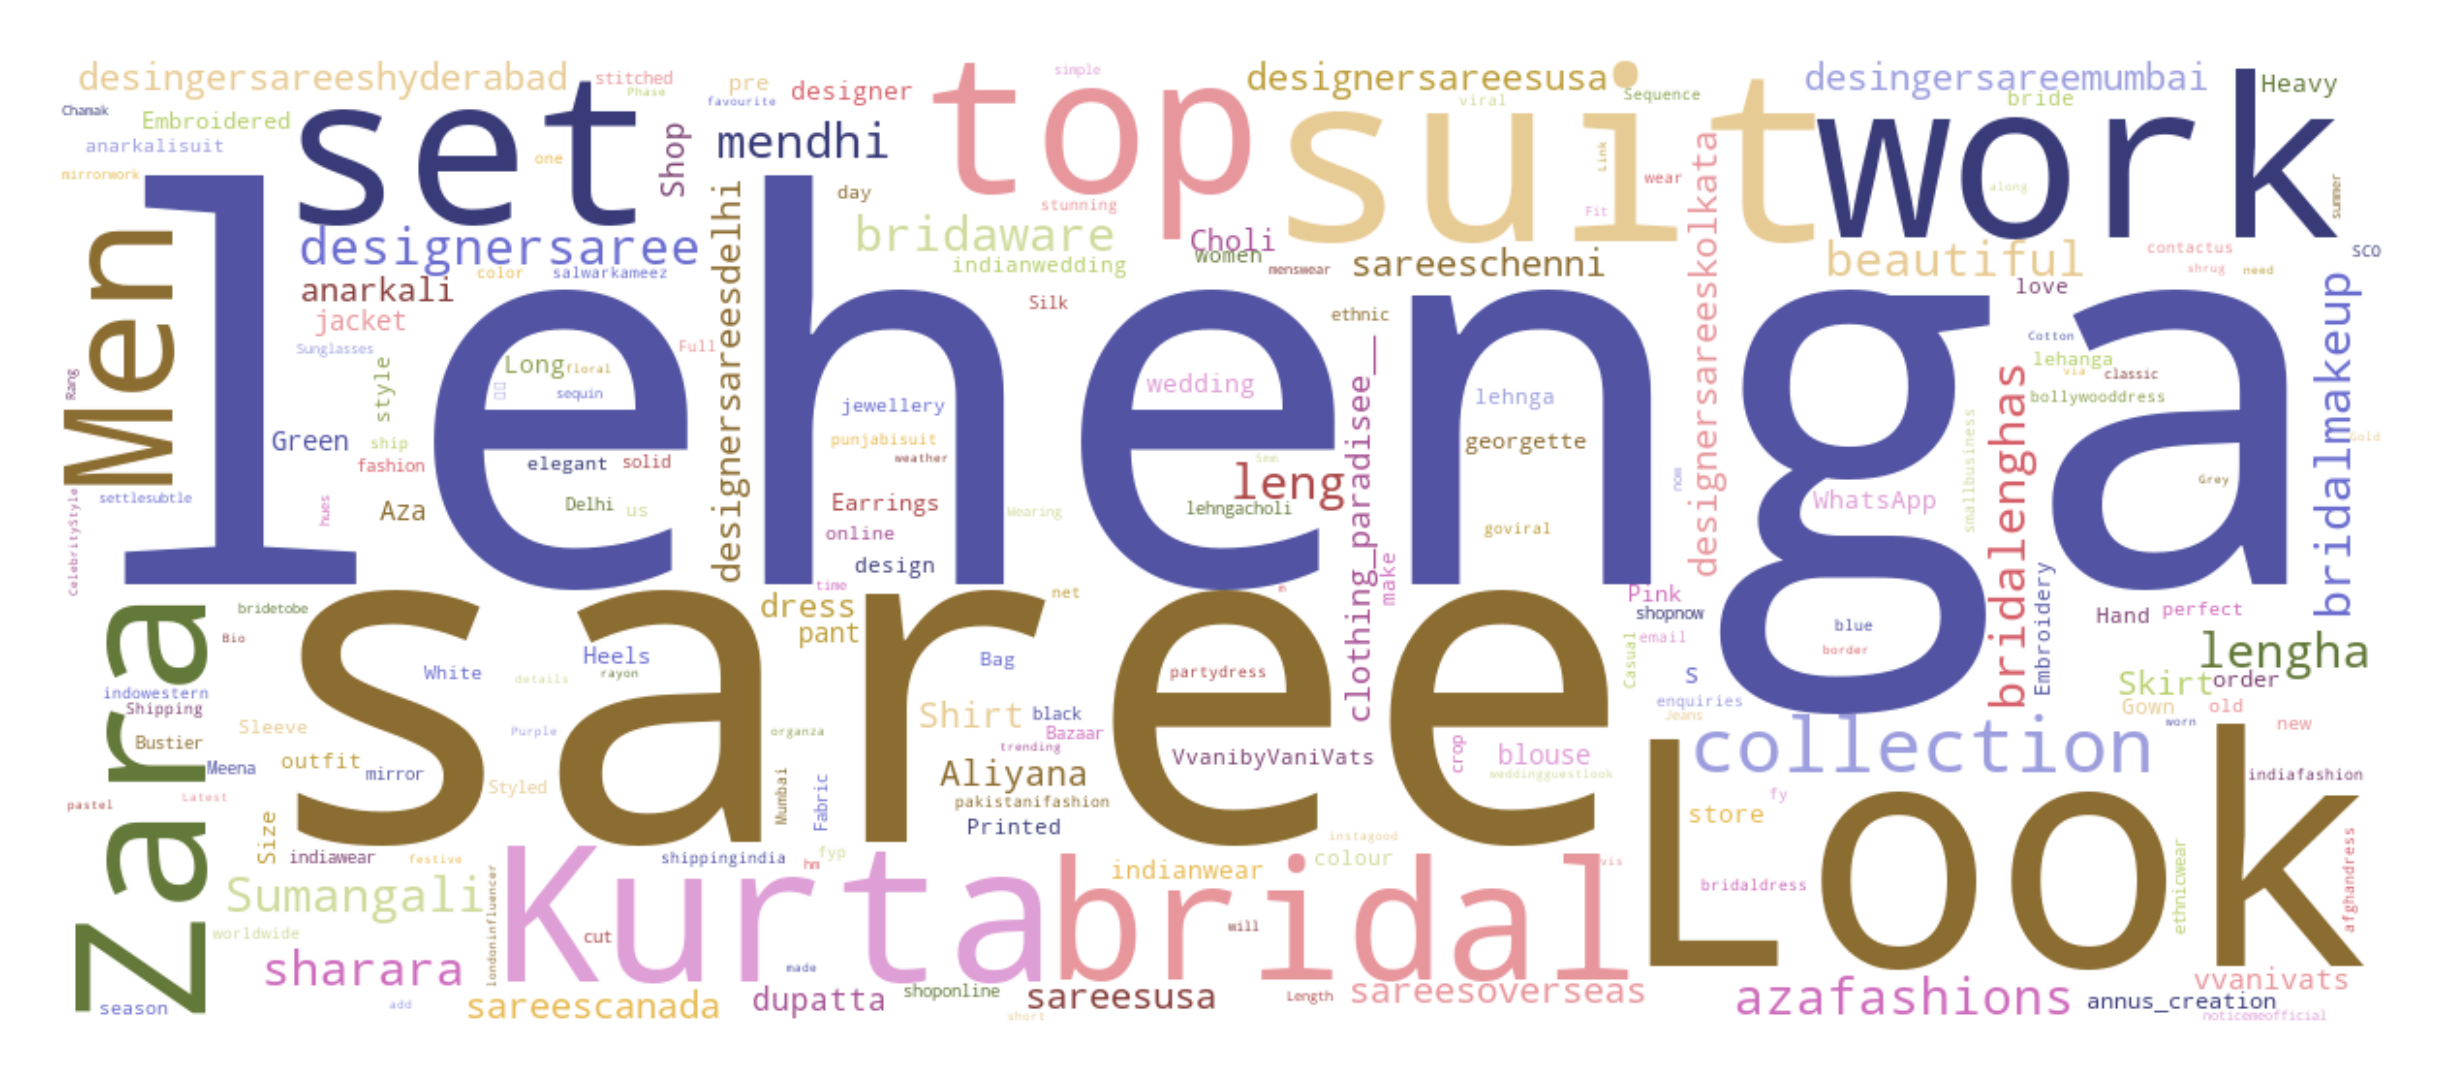

In [20]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white",random_state=1, 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [21]:
stop=[]
stop.append('@')
stop.append(',')
stop.append('.')
stop.append('#')
stop.append('!')
stop.append('$')
stop.append('&')
stop.append("*")
stop.append(";")
stop.append(":")
stop.append("?")
set(stop)

{'!', '#', '$', '&', '*', ',', '.', ':', ';', '?', '@'}

- Removing the unuseful words from the dataset to get the accuracy output/ trending words

In [22]:
all_headlines = ' '.join(df['post_metadata'].str.lower())
stopwords = STOPWORDS
stopwords.add('.')
stopwords.add(',')
stopwords.add(':-')
stopwords.add('•')
stopwords.add('&')
stopwords.add('set')
stopwords.add('look')
stopwords.add('work')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)

In [23]:
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

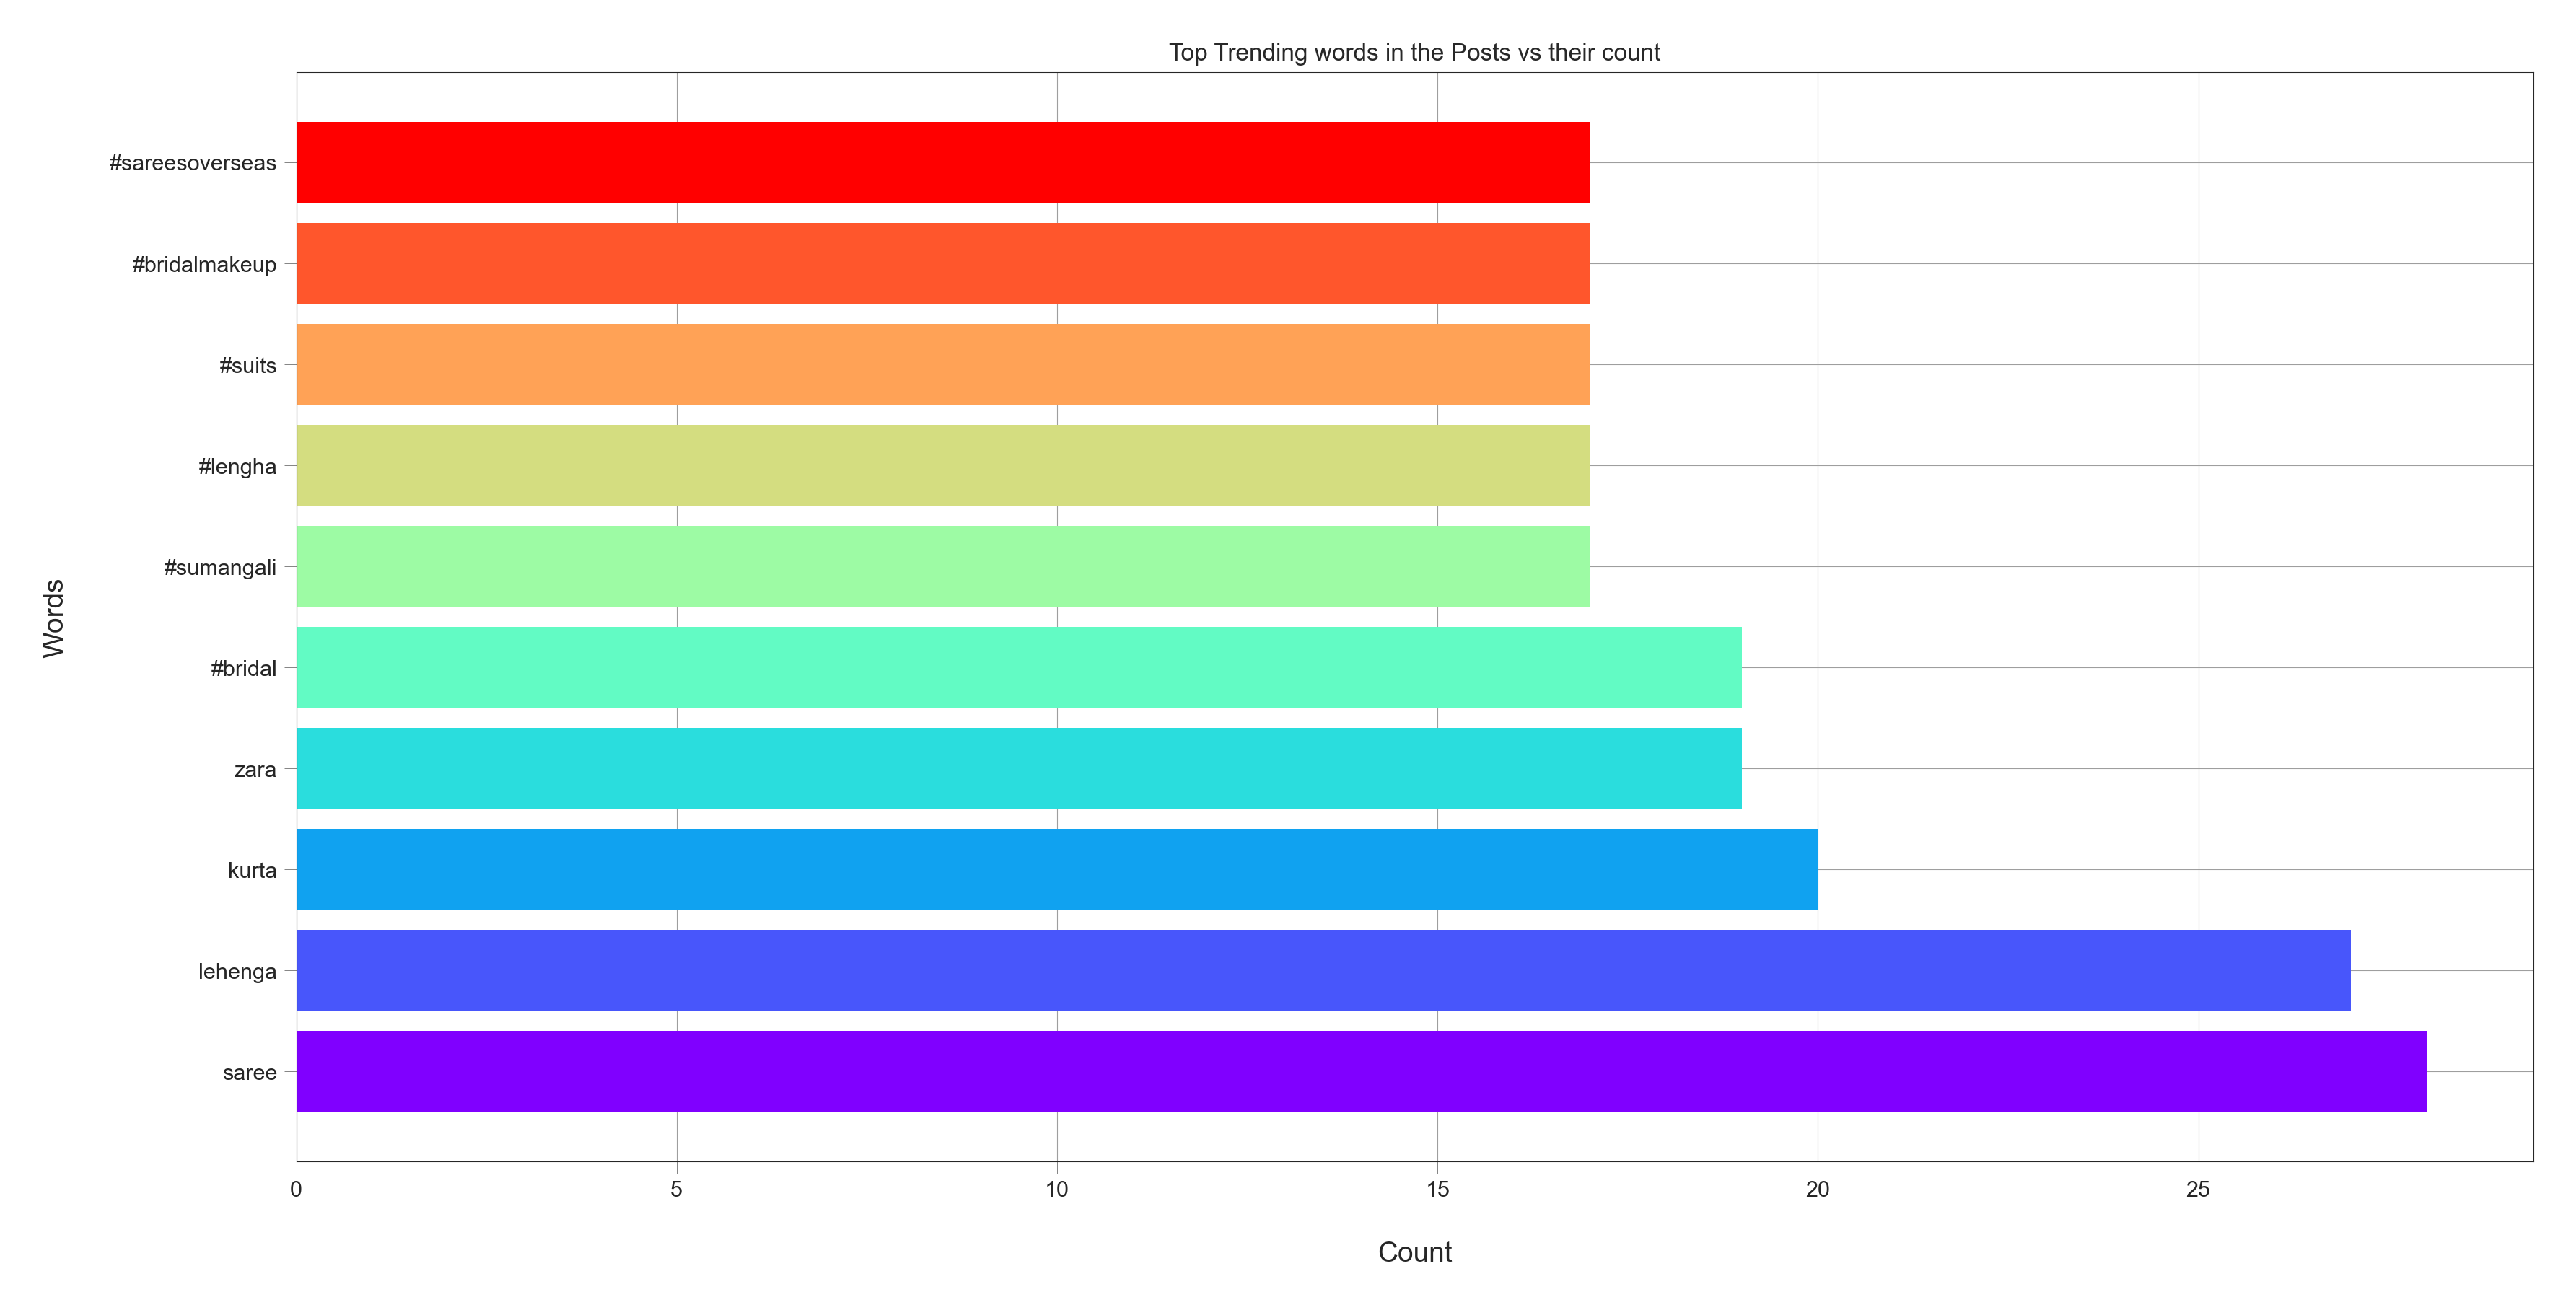

In [24]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top Trending words in the Posts vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [25]:
print("Top Trending words:",len(words))
print("Trending words:",words)

Top Trending words: 10
Trending words: ['saree', 'lehenga', 'kurta', 'zara', '#bridal', '#sumangali', '#lengha', '#suits', '#bridalmakeup', '#sareesoverseas']


- Here are Top trending keywords from the dataset:
`['saree', 'lehenga', 'kurta', 'zara', '#bridal', '#sumangali', '#lengha', '#suits', '#bridalmakeup', '#sareesoverseas']`

In [26]:
trend_score = list(df["post_metadata"].apply(lambda x: x.split()))
trend_score = [x for y in title_words for x in y]
data=Counter(trend_score).most_common(20)
data.sort()
filter_words = [word for word in all_headlines.split() if word not in stop]
counted_words = Counter(filter_words)
counts=[]
for letter,count in counted_words.most_common():
    counts.append(count)
total_word_count=sum(counts)
total_word_count

4818

In [27]:
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = Counter(filtered_words)

words = []
top_word_counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    top_word_counts.append(count)
top_word_counts

[28, 27, 20, 19, 19, 17, 17, 17, 17, 17]

In [28]:
df1=pd.read_csv("women_categories.csv")
df1.head(9)

Women_Western_&_Maternity_Wear                Ethnic_Wear  \
0                        Topwear                      Saree   
1                        Dresses            Kurtas & Kurtis   
2                          Jeans             Dress Material   
3                         Shorts              Lehenga Choli   
4                         Skirts  Kurta Sets & Salwar Suits   
5              Jeggings & Tights                      Gowns   
6              Trousers & Capris                   Dupattas   
7                           None                       None   
8                           None                       None   

                 Ethnic_Bottoms Footwear         Shoes      Beauty_&_Grooming  \
0                      Palazzos  Sandals  Sports Shoes                Make Up   
1                      Shararas    Flats  Casual Shoes              Skin Care   
2             Salwars & Patiala    Heels         Boots              Hair Care   
3                   Dhoti Pants   Wedges          None             Bath & Spa   
4               Ethnic Trousers     None          None  Deodorants & Perfumes   
5  Saree Shapewear & Petticoats     None          None                   None   
6                          None     None          None                   None   
7                          None     None          None                   None   
8                          None     None          None                   None   

              Jewellery       Accessories Slippers_&_Flip- Flop's Watches  \
0  Artificial Jewellery          Handbags                    None    None   
1      Silver Jewellery     Shoulder Bags                    None    None   
2    Precious Jewellery             Totes                    None    None   
3        Coins and Bars        Sling bags                    None    None   
4                  None          Clutches                    None    None   
5                  None   Wallets & Belts                    None    None   
6                  None  Luggage & Travel                    None    None   
7                  None        Sunglasses                    None    None   
8                  None            Frames                    None    None   

  Smart_Watches  
0          None  
1          None  
2          None  
3          None  
4          None  
5          None  
6          None  
7          None  
8          None

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Women_Western_&_Maternity_Wear  9 non-null      object
 1   Ethnic_Wear                     9 non-null      object
 2   Ethnic_Bottoms                  9 non-null      object
 3   Footwear                        9 non-null      object
 4   Shoes                           9 non-null      object
 5   Beauty_&_Grooming               9 non-null      object
 6   Jewellery                       9 non-null      object
 7   Accessories                     9 non-null      object
 8   Slippers_&_Flip- Flop's         9 non-null      object
 9   Watches                         9 non-null      object
 10  Smart_Watches                   9 non-null      object
dtypes: object(11)
memory usage: 920.0+ bytes


In [30]:
#Data cleaning
df1[df1["Footwear"].apply(lambda x: pd.isna(x))].head(3)

Empty DataFrame
Columns: [Women_Western_&_Maternity_Wear, Ethnic_Wear, Ethnic_Bottoms, Footwear, Shoes, Beauty_&_Grooming, Jewellery, Accessories, Slippers_&_Flip- Flop's, Watches, Smart_Watches]
Index: []

In [31]:
def check_keyword(wo):
    y=0
    for i in df1.columns:
        for j in df1[i]:
            for k in range(len(wo)):
                if wo[k].lower() in j.lower():
                    y=k
                    break
                break
            break
    return y

In [32]:
#To know the top extracted product is a keyword or not that matches a product in flipkart.
x_ind=check_keyword(words)
x_ind

0

In [33]:
#loc_keywords - Locations of trending keyword
loc_keywords=df[df['post_metadata'].str.contains(words[x_ind])].index
arr=[]
for i in range(len(loc_keywords)):
    a=int(df['likes'][loc_keywords[i]])
    arr.append(a)
    
print('Trending Keyword:',words[x_ind])
print('Total Likes:',sum(arr))
print('Average Likes:',round(sum(arr)/i))
print('Top liked post:',max(arr))
print('least liked post:',min(arr))
print('Post Link:',df['post_link'][df[df['likes']==max(arr)].index[0]])

Trending Keyword: saree
Total Likes: 4007068
Average Likes: 97733
Top liked post: 1189129
least liked post: 359
Post Link: https://www.instagram.com/p/CWnsbJMPJwJ/


# Trending score analysis

In [34]:
#trending score
for i in range(len(words)):
    print(words[i],"-->",((top_word_counts[i]/total_word_count)*100))

saree --> 0.5811540058115401
lehenga --> 0.5603985056039851
kurta --> 0.4151100041511001
zara --> 0.39435450394354504
#bridal --> 0.39435450394354504
#sumangali --> 0.352843503528435
#lengha --> 0.352843503528435
#suits --> 0.352843503528435
#bridalmakeup --> 0.352843503528435
#sareesoverseas --> 0.352843503528435


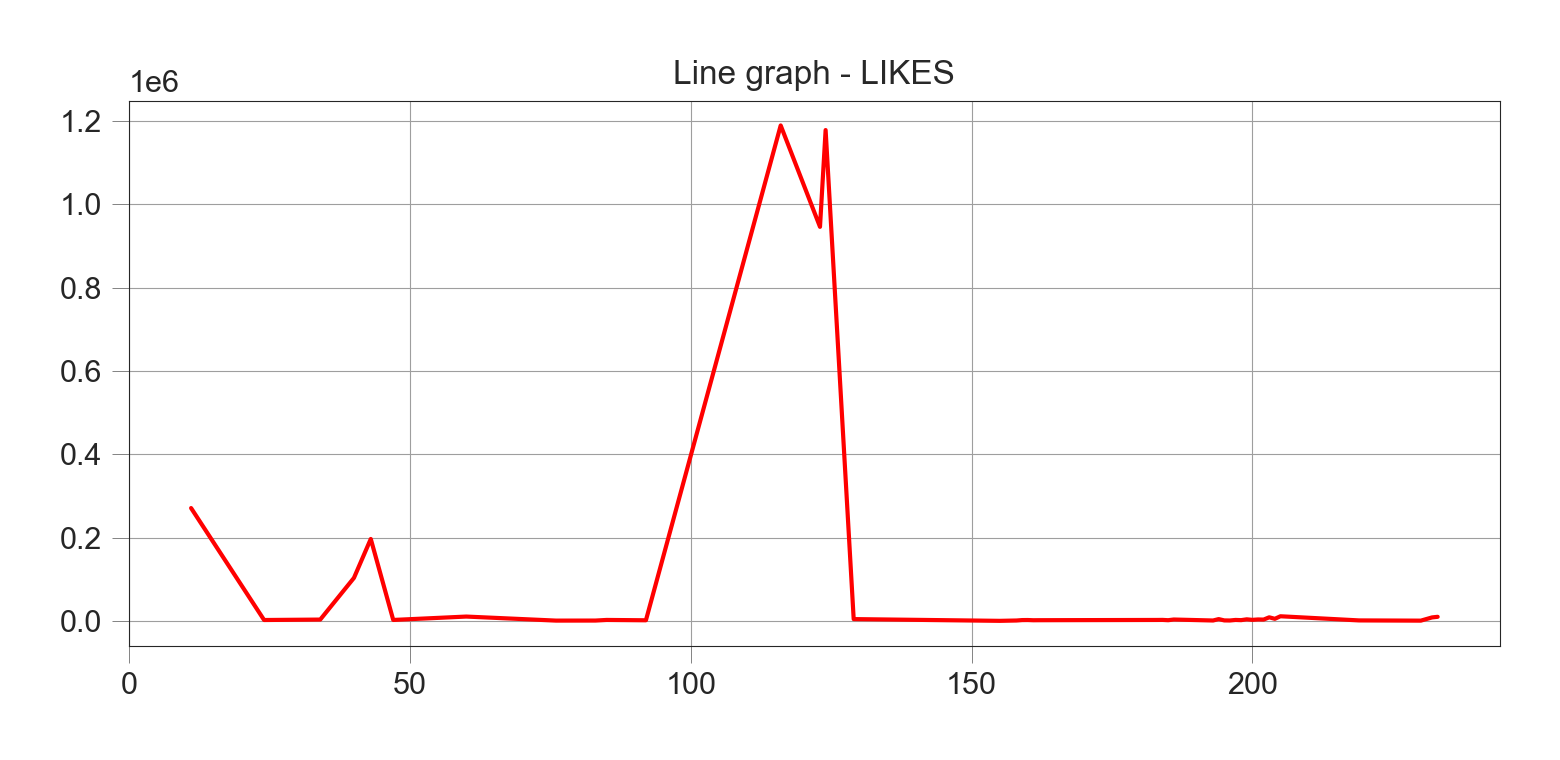

In [35]:
plt.rcParams["figure.figsize"] =7.50, 3.50
plt.rcParams["figure.autolayout"] = True

x = np.array(loc_keywords)
y =np.array(arr)

plt.title("Line graph - LIKES")
plt.plot(x, y, color="red")

plt.show()

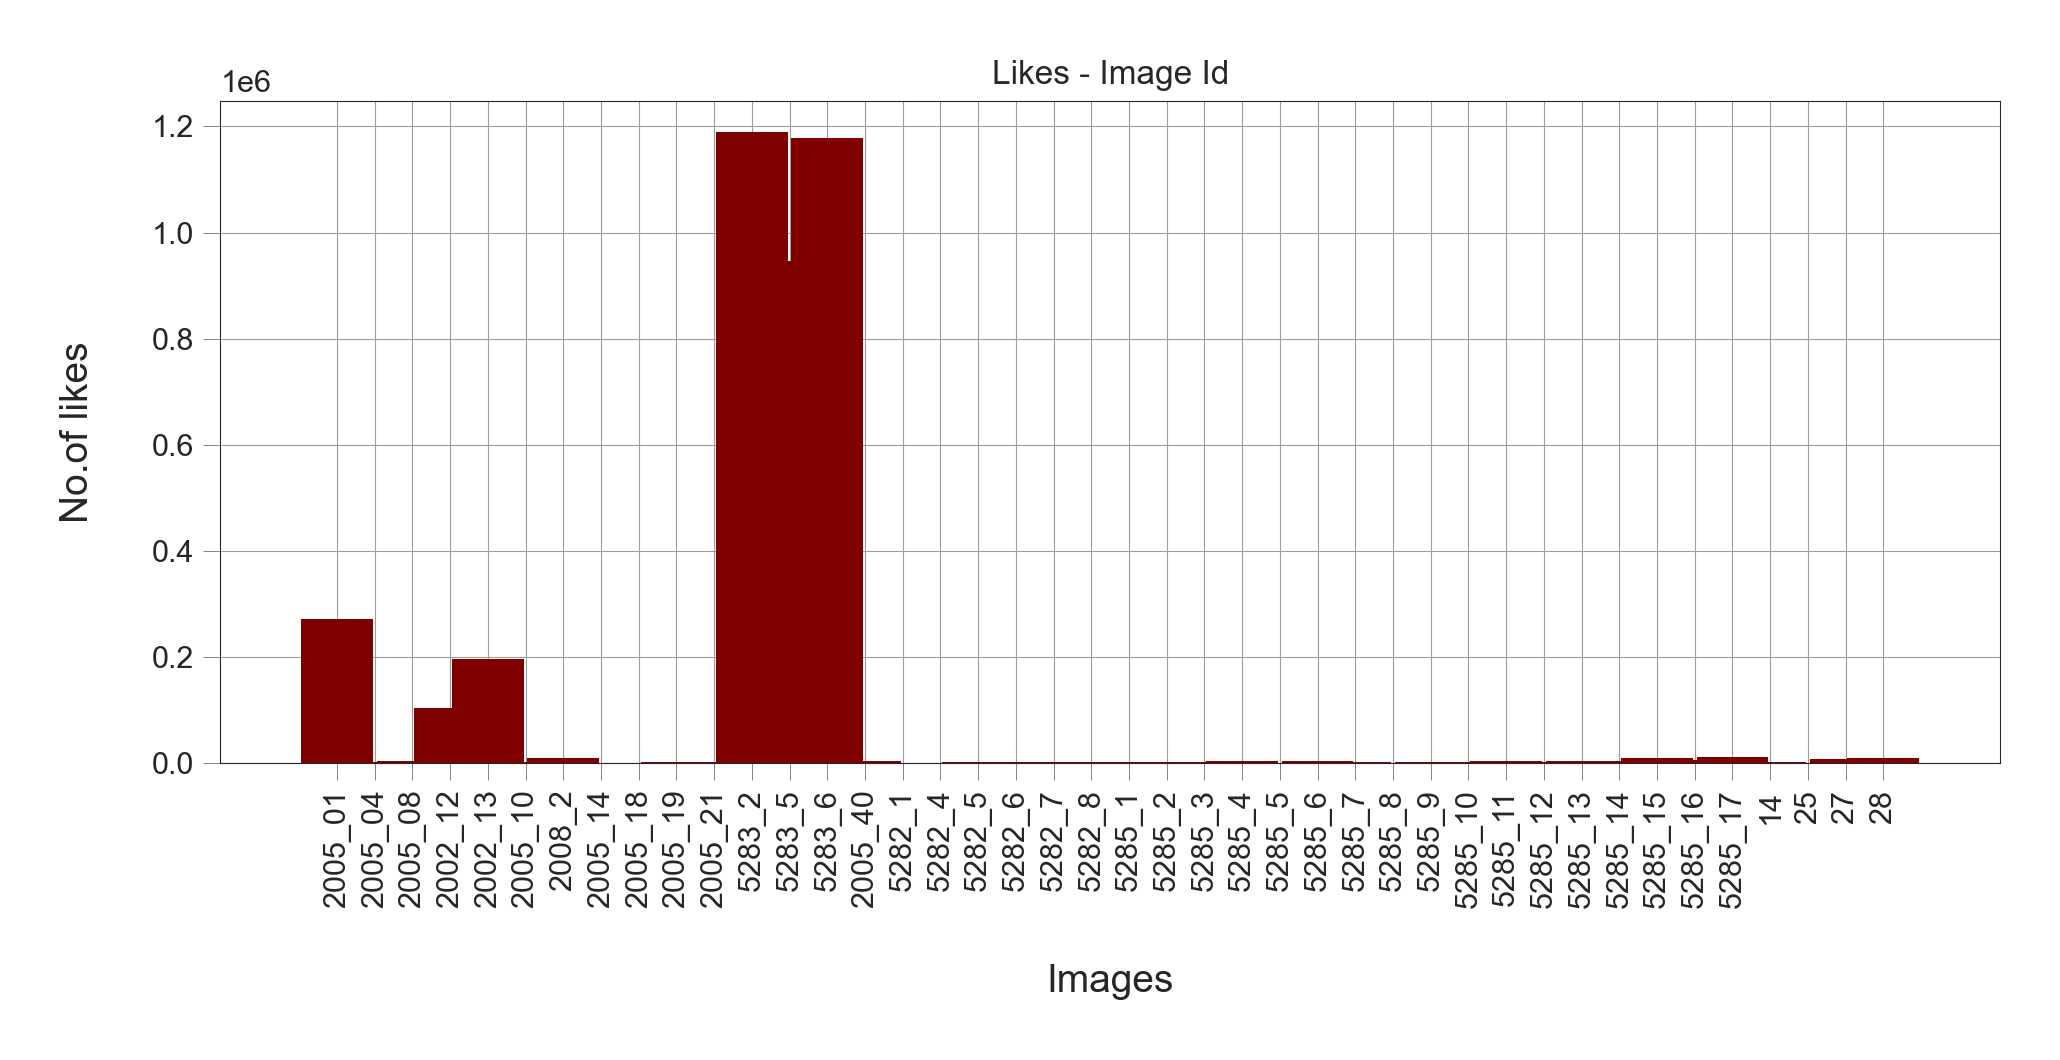

In [36]:
image_id=[]
for i in df['image_id'][loc_keywords]:
    image_id.append(i)


fig = plt.figure(figsize = (10, 5))
plt.bar(image_id, arr, color ='maroon',width = 1.9)
plt.xlabel("Images")
plt.ylabel("No.of likes")
plt.title("Likes - Image Id")
plt.xticks(rotation = 90)
plt.show()

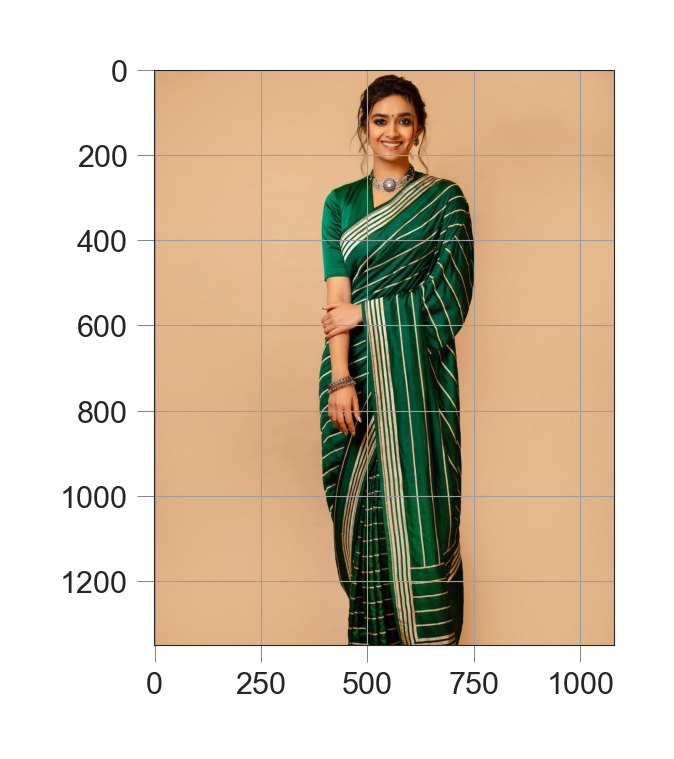

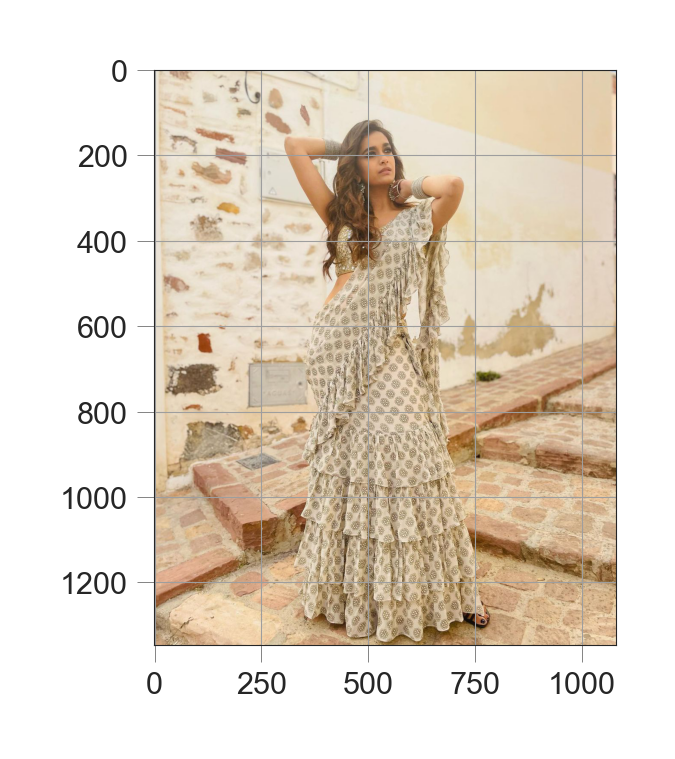

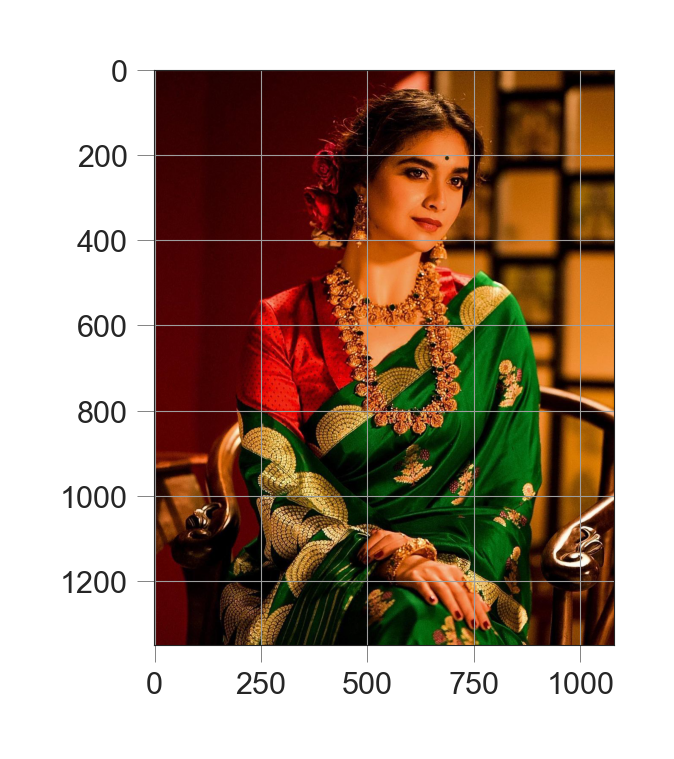

In [37]:
img_arr=arr
img_arr.sort()
ind1=df['image_id'][df[df['likes']==img_arr[-1]].index[0]]
ind2=df['image_id'][df[df['likes']==img_arr[-2]].index[0]]
ind3=df['image_id'][df[df['likes']==img_arr[-3]].index[0]]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def process(filename: str=None) -> None:
    image = mpimg.imread("flipkart_images/"+filename+".jpg")
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

for file in ind1,ind2,ind3:
    process(file)

## Comment count measurement

- Detecting the top commented post according to the extracted trending keyword
- Top commented post link is also generated from the given dataset
- We need to generate the pictures of the top commented post with respective to the trending keyword

In [38]:
filt=df[df['post_metadata'].str.contains(words[x_ind])].index
arr1=[]
for i in range(len(filt)):
    a=int(df['no_of_comments'][filt[i]])
    arr1.append(a)
print('Trending Keyword:',words[x_ind])
print("Total Comment's count:",sum(arr1))
print('Average comment count:',round(sum(arr1)/i))
print('Top commented post:',max(arr1))
print('least commented post:',min(arr1))
print('Post Link:',df['post_link'][df[df['no_of_comments']==max(arr1)].index[0]])

Trending Keyword: saree
Total Comment's count: 19021
Average comment count: 464
Top commented post: 5624
least commented post: 0
Post Link: https://www.instagram.com/p/CWnsbJMPJwJ/


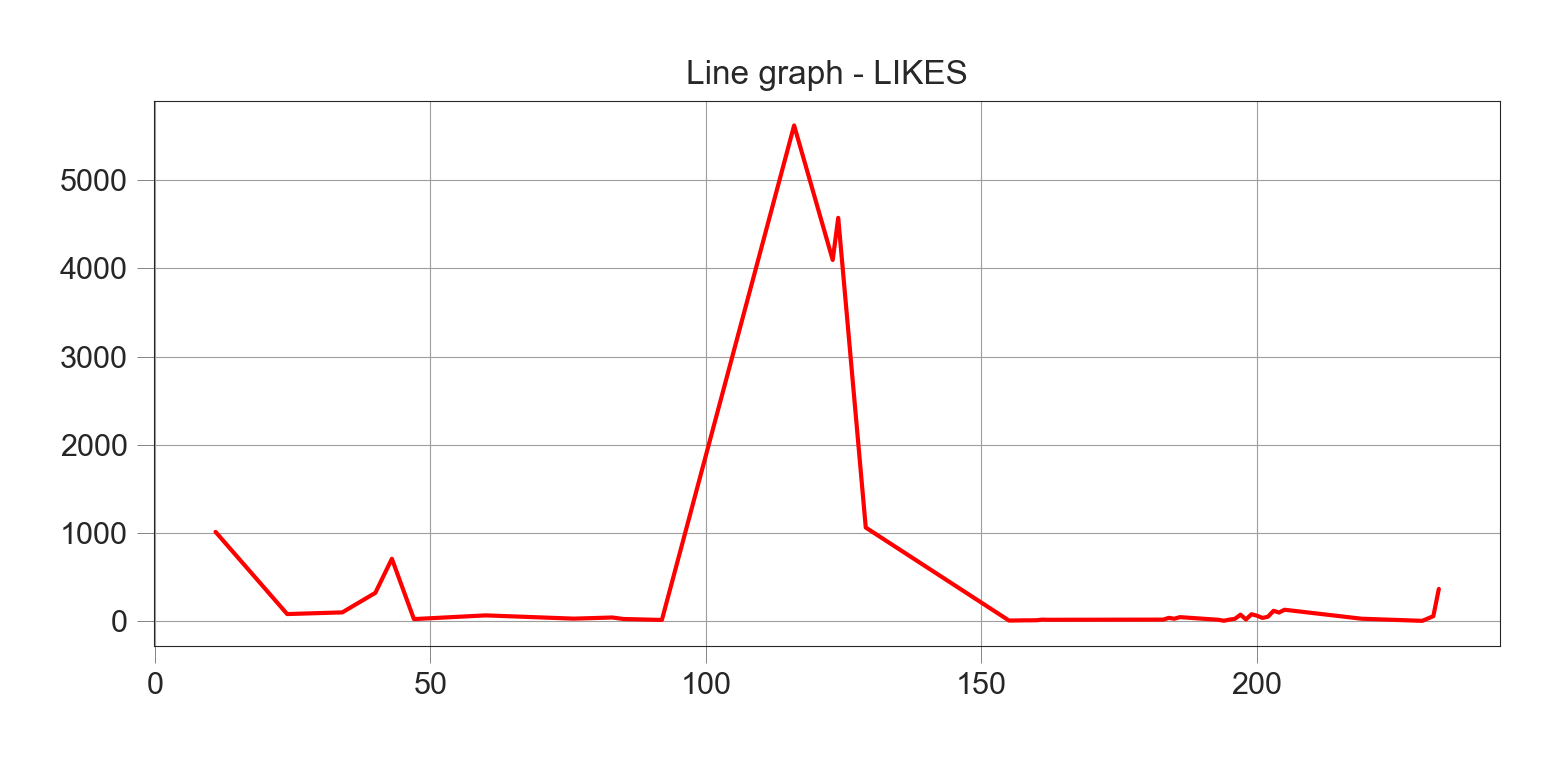

In [39]:
plt.rcParams["figure.figsize"] =7.50, 3.50
plt.rcParams["figure.autolayout"] = True

x = np.array(loc_keywords)
y =np.array(arr1)

plt.title("Line graph - LIKES")
plt.plot(x, y, color="red")

plt.show()

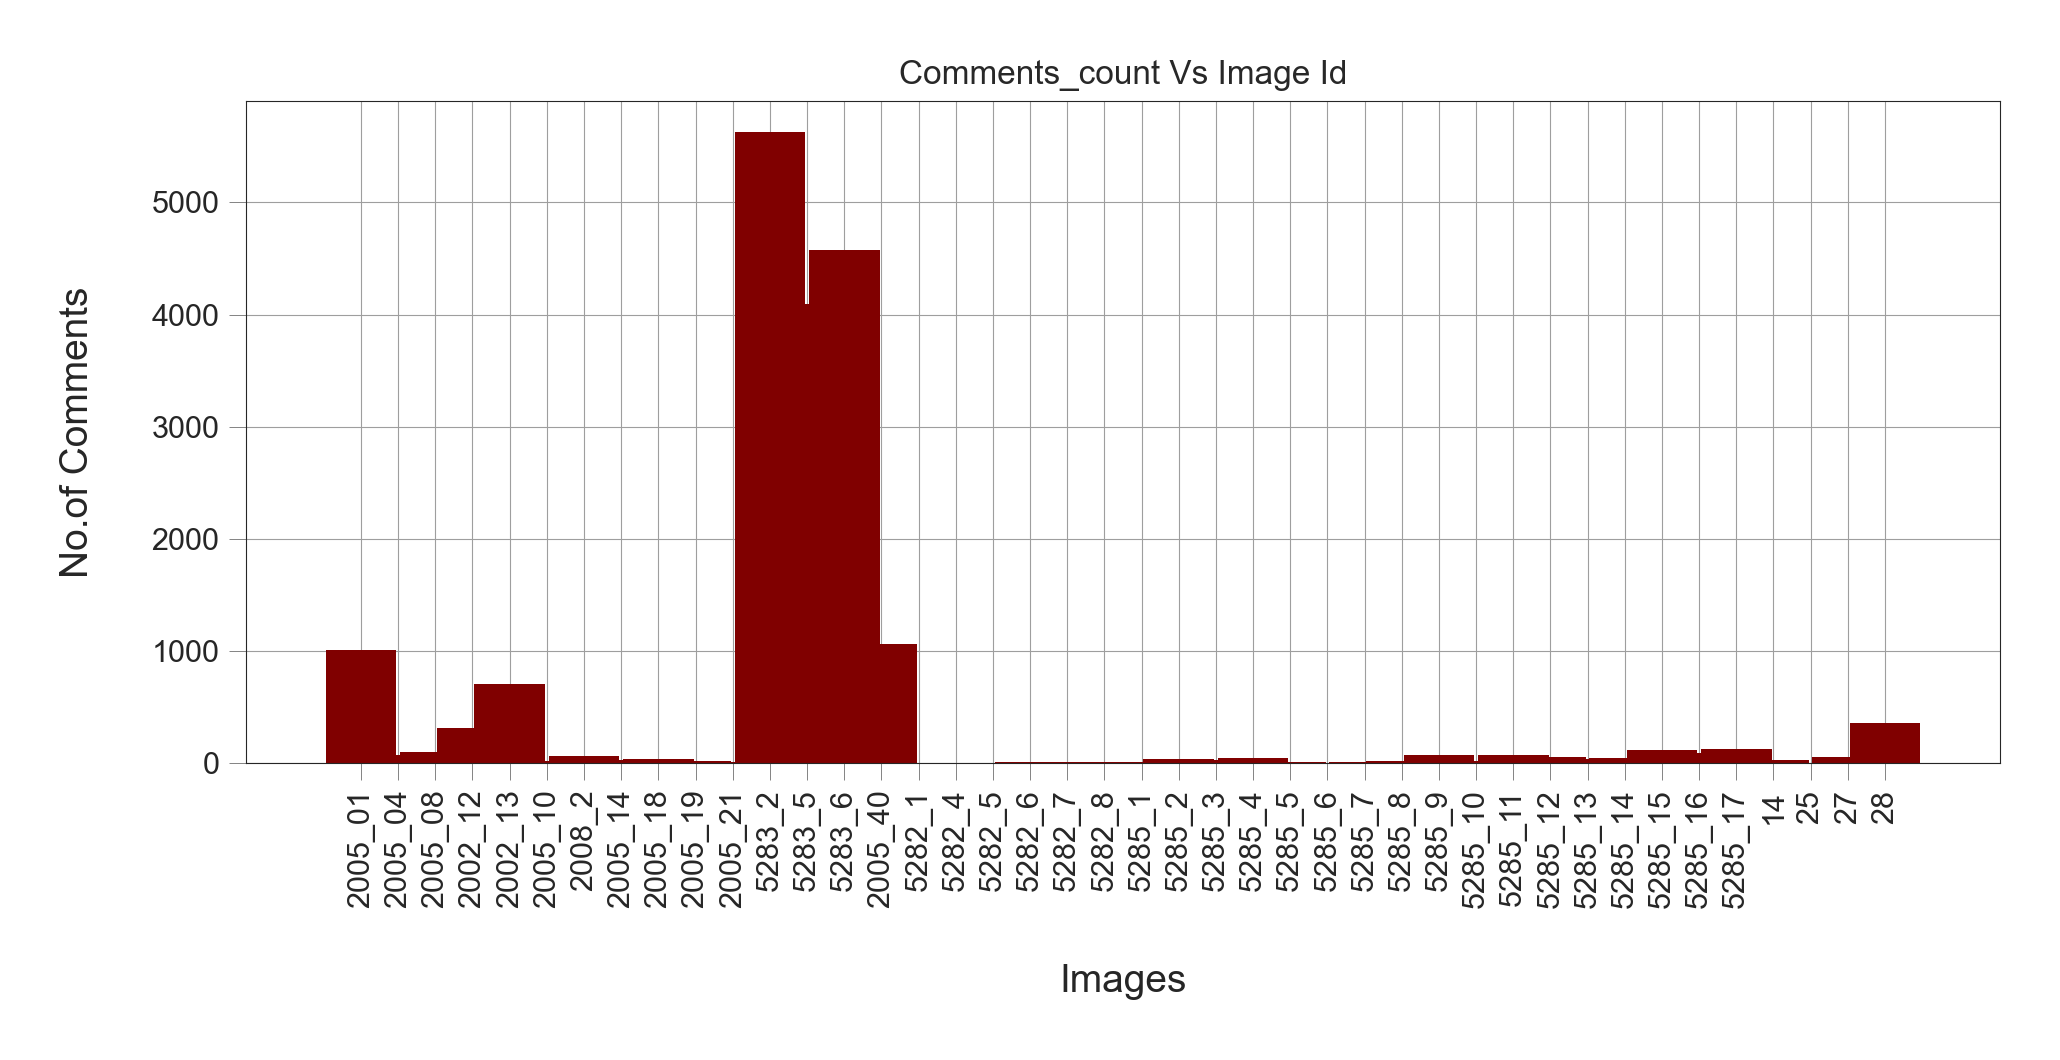

In [40]:
fig = plt.figure(figsize = (10, 5))
plt.bar(image_id, arr1, color ='maroon',width = 1.9)
plt.xlabel("Images")
plt.ylabel("No.of Comments")
plt.title("Comments_count Vs Image Id")
plt.xticks(rotation = 90)
plt.show()

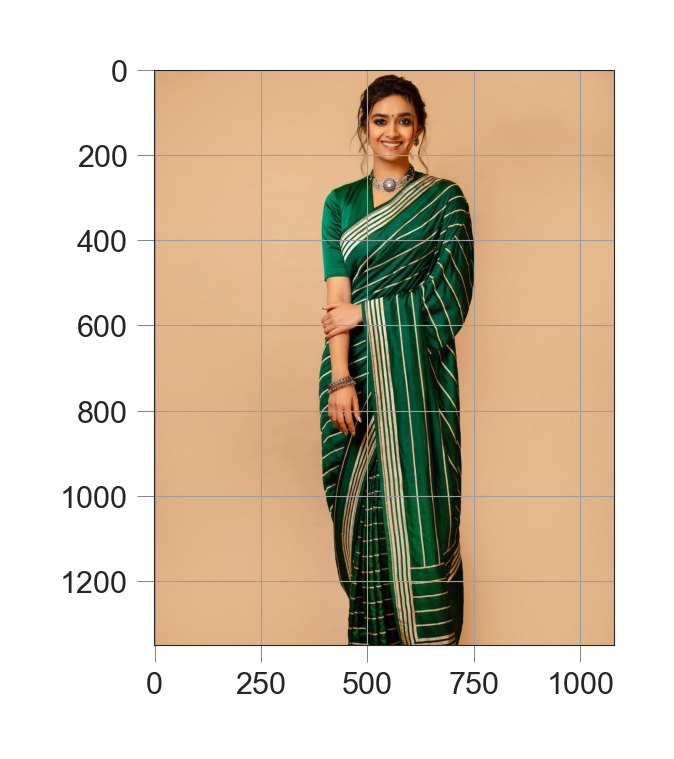

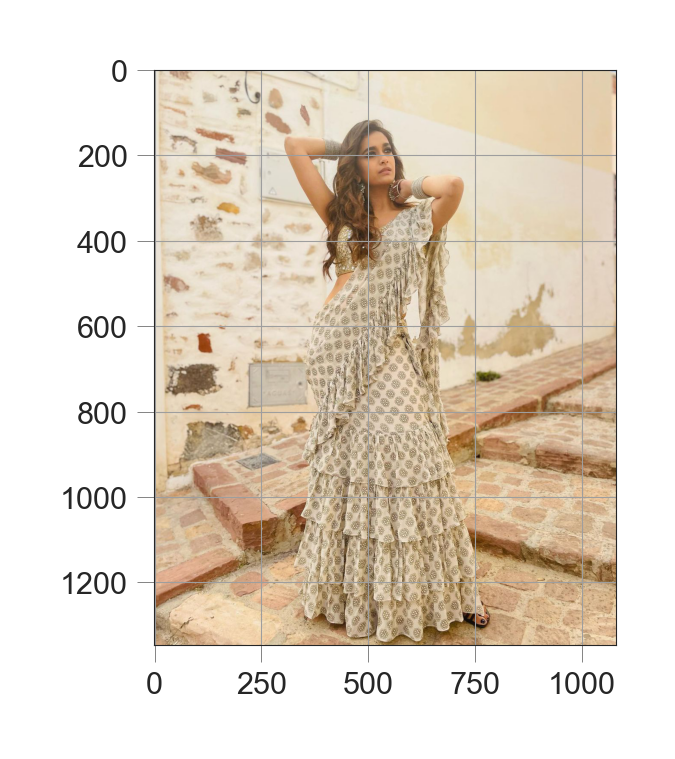

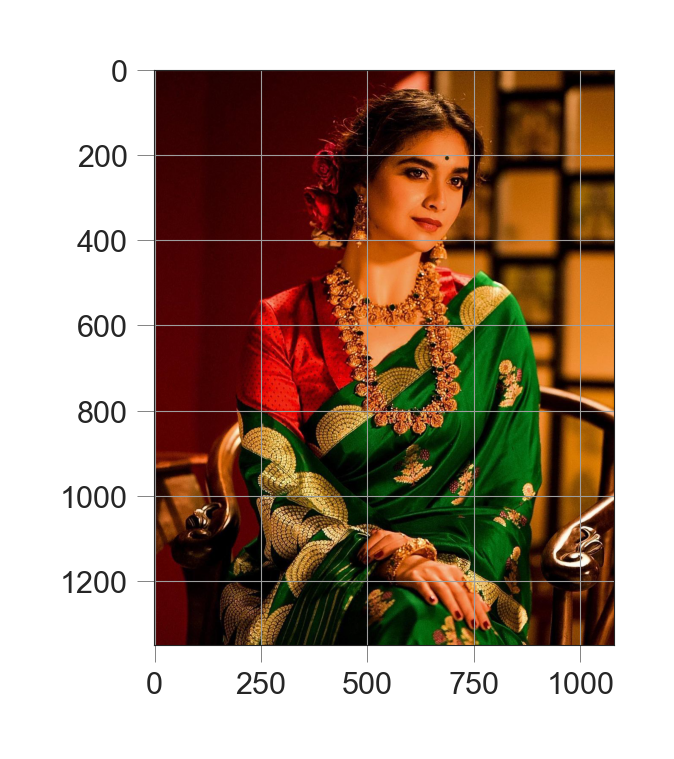

In [41]:
img_arr1=arr1
img_arr1.sort()
in1=df['image_id'][df[df['no_of_comments']==img_arr1[-1]].index[0]]
in2=df['image_id'][df[df['no_of_comments']==img_arr1[-2]].index[0]]
in3=df['image_id'][df[df['no_of_comments']==img_arr1[-3]].index[0]]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def process(filename: str=None) -> None:
    image = mpimg.imread("flipkart_images/"+filename+".jpg")
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

for file in in1,in2,in3:
    process(file)

In [42]:
words[x_ind]

'saree'

In [43]:
patterns=pd.read_csv('pattern.csv')
df['post_metadata']=df['post_metadata'].str.lower()
ptn=patterns[words[x_ind].capitalize()].str.lower().to_list()
df4=df.loc[filt]

In [44]:
max=0
pattern_keyword=''
for i in ptn:
    inx=df4[df4['post_metadata'].str.contains(str(i))].index.to_list()
    if max<=len(inx):
        max=len(inx)
        pattern_keyword=i
print(pattern_keyword,max)

wedding 6


- Here the pattern of the trending keyword is **`Wedding`**

## Mapping Trending Keyword with Flipkart search Databases

- Map the trending keyword with the flipkart category
- As part of Deliverable 1 we need to predict the Category, Sub-Category, Vertical keywords and product attributes for the trending keyword

In [45]:
url_1=[]
trend_keyword=words[x_ind]
for i in df1.columns:
    for j in df1[i]:
        if trend_keyword.lower() in j.lower():
            print("Category: Fashion")
            print("Sub-Category: Women's Fashion")
            print("Vertical word: ",i)
            print("Trending attribute:",pattern_keyword)
            print("Trending keyword: ",j)
            a = 'https://www.flipkart.com/search?q={0} {1} {2}'.format(i,pattern_keyword,j)
            print("Generated link: ",a.replace(" ","%20"),"\n")
            url_1.append(a)

Category: Fashion
Sub-Category: Women's Fashion
Vertical word:  Ethnic_Wear
Trending attribute: wedding
Trending keyword:  Saree
Generated link:  https://www.flipkart.com/search?q=Ethnic_Wear%20wedding%20Saree 

Category: Fashion
Sub-Category: Women's Fashion
Vertical word:  Ethnic_Bottoms
Trending attribute: wedding
Trending keyword:  Saree Shapewear & Petticoats
Generated link:  https://www.flipkart.com/search?q=Ethnic_Bottoms%20wedding%20Saree%20Shapewear%20&%20Petticoats 



In [46]:
from urllib import request
import webbrowser
for i in range(len(url_1)):
    webbrowser.open(url_1[i],new=2)

## Extract Trends from the Images

- Here we consider a Dataset From youtube trending videos
- Dataset contains thumbnails of the trending videos in youtube. If the thumbnail consists text related to the products then the model maps those keywords with the products in flipkart

In [47]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
im_1_path = 'fashion1.jpg'
im_2_path = 'watch1.jpg'
im_3_path = 'shoes1.jfif'
im_4_path = 'shirts1.jpg'
im_5_path = 'shirts2.jpg'

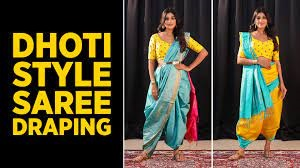

In [49]:
from IPython.display import Image
Image(im_1_path,width=200,height=400)

In [50]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [51]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


#### Here is the sample image of a thumbnail from YouTube. From this text is extracted using OCR

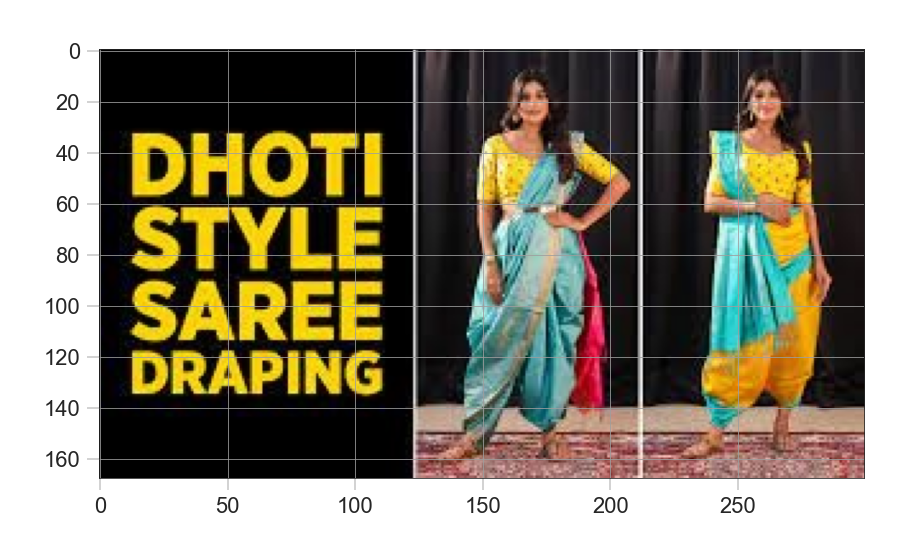

In [52]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

#### Overlay recognized text on image using OpenCV

In [53]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: DHOTI (Probability: 0.52)
Detected text: STYLE (Probability: 0.99)
Detected text: SAREE (Probability: 1.00)
Detected text: DRAPING (Probability: 1.00)


<Figure size 432x288 with 0 Axes>

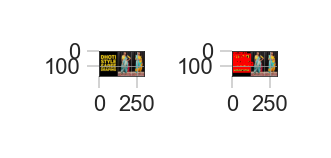

In [54]:
overlay_ocr_text(im_1_path, '1_saree')

In [55]:
result = recognize_text(im_1_path)

sen = ''
for (bbox, text, prob) in result:
    sen += f'{text} '
''.join(sen)
extracted_text=sen.split()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [56]:
sentence=extracted_text
print("Extracted Text from the Thumbnail: ",extracted_text)

Extracted Text from the Thumbnail:  ['DHOTI', 'STYLE', 'SAREE', 'DRAPING']


In [57]:
url_2=[]
d=0
while sentence:
    trend_keyword=sentence[check_keyword(sentence)]
    sentence.remove(sentence[d])
    for i in df1.columns:
        for j in df1[i]:
            if trend_keyword.lower() in j.lower():
                print("Category: Fashion")
                print("Sub-Category: Women's Fashion")
                print("Vertical word: ",i)
                print("Trending keyword: ",j,"\n")
                a = 'https://www.flipkart.com/search?q={0} {1}'.format(i,j)
                print("Generated link: ",a.replace(" ","%20"))
                url_2.append(a)

Category: Fashion
Sub-Category: Women's Fashion
Vertical word:  Ethnic_Bottoms
Trending keyword:  Dhoti Pants 

Generated link:  https://www.flipkart.com/search?q=Ethnic_Bottoms%20Dhoti%20Pants
Category: Fashion
Sub-Category: Women's Fashion
Vertical word:  Ethnic_Wear
Trending keyword:  Saree 

Generated link:  https://www.flipkart.com/search?q=Ethnic_Wear%20Saree
Category: Fashion
Sub-Category: Women's Fashion
Vertical word:  Ethnic_Bottoms
Trending keyword:  Saree Shapewear & Petticoats 

Generated link:  https://www.flipkart.com/search?q=Ethnic_Bottoms%20Saree%20Shapewear%20&%20Petticoats


In [58]:
from urllib import request
import webbrowser
for i in range(len(url_1)):
    webbrowser.open(url_1[i],new=2)
for i in range(len(url_2)):
    webbrowser.open(url_2[i],new=2)

# Conclusions

1. ***`Saree and Lehanga`*** are the trending keywords on instagram. Hashtags will be like **`#saree #lehanga`**
2. Nearly 57 entries are there in 7th month of 2022
3. Top 10 keywords extracted from the post metadata are **`['saree', 'lehenga', 'kurta', 'zara', '#bridal', '#sumangali', '#lengha', '#suits', '#bridalmakeup', '#sareesoverseas']`**
4. Total words are `4818` in the dataset, trending keyword `Saree` count is `28`, sum of top trending keyword occurances `198`
5. * Trending score ***`58%`*** for `Saree`
   * Tending score ***`56%`*** for `Lehanga`
6. Top trending analysis based on likes are:
    * Trending keyword: **`Saree`**
    * Top liked post: **`1189129`**
    * Total Likes: **`4007068`**
    * Average Likes: **`97733`**
    * Post Link : https://www.instagram.com/p/CWnsbJMPJwJ/
7. Top trending analysis based on comments are:
    * Top commented post: **`5624`**
    * Total comment count: **`19021`**
    * Average comment count: **`464`**
    * Post link : https://www.instagram.com/p/CWnsbJMPJwJ/
8. Trending attribute of the product is ***`Wedding`***
9. * Category : **`Fashion`**
    * Sub-category : **`Women Ethnic Wear`**
    * Vertical : **`Saree`**
    * Trending attribute type: **`pattern`**
    * Trending attribute value: **`wedding`**
    * Generated Query : https://www.flipkart.com/search?q=Ethnic_Wear%20wedding%20Saree
10. Text Extracted from the thumbnail of the YouTube video **`['DHOTI', 'STYLE', 'SAREE', 'DRAPING']`**
11. Mapped structred keywords from text which is extracted from the image
    1. 
    * Category: Fashion
    * Sub-Category: Women's Fashion
    * Vertical word:  Ethnic_Bottoms
    * Trending keyword:  Dhoti Pants 
    * Generated link:  https://www.flipkart.com/search?q=Ethnic_Bottoms%20Dhoti%20Pants
    2. 
    * Category: Fashion
    * Sub-Category: Women's Fashion
    * Vertical word:  Ethnic_Wear
    * Trending keyword:  Saree 
    * Generated link:  https://www.flipkart.com/search?q=Ethnic_Wear%20Saree
    3. 
    * Category: Fashion
    * Sub-Category: Women's Fashion
    * Vertical word:  Ethnic_Bottoms
    * Trending keyword:  Saree Shapewear & Petticoats 
    * Generated link:  https://www.flipkart.com/search?q=Ethnic_Bottoms%20Saree%20Shapewear%20&%20Petticoats
